In [88]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler,OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix,ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import load_model
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score, classification_report



In [89]:
filename = 'data_evaluacion.csv'
#filename='data.csv'
df = pd.read_csv(filename)
print (df.shape)
df.head(5)

(48841, 15)


,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [90]:
df.nunique()

39                  74
State-gov            9
77516            28522
Bachelors           16
13                  16
Never-married        7
Adm-clerical        15
Not-in-family        6
White                5
Male                 2
2174               123
0                   99
40                  96
United-States       42
<=50K                2
dtype: int64

In [91]:
#Dar nombres a las columnas
nombre_columna = ['edad', 'empleador_tipo', 'peso', 'educacion', 'numero_educacion', 'estado_civil', 
                'ocupacion', 'relacion', 'raza', 'sexo', 'ganancia', 'perdida', 
                'horas_semana', 'pais_natal', 'ingresos']

df.columns=nombre_columna


In [92]:
#reemplazamos los registos ? con valores nulos
df[df == '?'] = np.nan
df.info()

for col in ['empleador_tipo', 'ocupacion', 'pais_natal']:
    mode_value = df[col].mode()[0]  
    df[col] = df[col].fillna(mode_value) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48841 entries, 0 to 48840
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   edad              48841 non-null  int64 
 1   empleador_tipo    46042 non-null  object
 2   peso              48841 non-null  int64 
 3   educacion         48841 non-null  object
 4   numero_educacion  48841 non-null  int64 
 5   estado_civil      48841 non-null  object
 6   ocupacion         46032 non-null  object
 7   relacion          48841 non-null  object
 8   raza              48841 non-null  object
 9   sexo              48841 non-null  object
 10  ganancia          48841 non-null  int64 
 11  perdida           48841 non-null  int64 
 12  horas_semana      48841 non-null  int64 
 13  pais_natal        47984 non-null  object
 14  ingresos          48841 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


In [93]:
df.nunique()

edad                   74
empleador_tipo          8
peso                28522
educacion              16
numero_educacion       16
estado_civil            7
ocupacion              14
relacion                6
raza                    5
sexo                    2
ganancia              123
perdida                99
horas_semana           96
pais_natal             41
ingresos                2
dtype: int64

In [94]:
#Ver si existen datos nulos
df.isnull().sum()

edad                0
empleador_tipo      0
peso                0
educacion           0
numero_educacion    0
estado_civil        0
ocupacion           0
relacion            0
raza                0
sexo                0
ganancia            0
perdida             0
horas_semana        0
pais_natal          0
ingresos            0
dtype: int64

In [95]:
df

,edad,empleador_tipo,peso,educacion,numero_educacion,estado_civil,ocupacion,relacion,raza,sexo,ganancia,perdida,horas_semana,pais_natal,ingresos
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50K
48837,64,Private,321403,HS-grad,9,Widowed,Prof-specialty,Other-relative,Black,Male,0,0,40,United-States,<=50K
48838,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50K
48839,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50K


In [96]:
#Dividir las variables x y y

x = df.drop('ingresos', axis=1)
y = df['ingresos']


In [97]:
categorizar = ['sexo', 'raza', 'empleador_tipo', 'educacion', 'estado_civil', 'ocupacion', 'relacion', 'pais_natal']

# Crear una instancia de LabelEncoder
#le = LabelEncoder()

# Aplicar LabelEncoder a cada columna categórica
"""for col in categorizar:
    x[col] = le.fit_transform(x[col])"""

#Get dami
x = pd.get_dummies(x, columns=categorizar)

In [98]:
#Dividir en daos de prueba y entrenamiento

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1, stratify=y)

In [99]:
#Normalizar
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [100]:
# Ajustar y transformar las etiquetas de entrenamiento y prueba
le = LabelEncoder()
y_train= le.fit_transform(y_train)
y_test = le.transform(y_test)
# Convertir las etiquetas a formato categórico (one-hot encoding)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)



In [101]:
# Construcción del modelo de red neuronal
model = Sequential()
model.add(Dense(64, input_dim=x_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(y_train.shape[1], activation='softmax'))
# Compilación del modelo
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
# Entrenamiento del modelo
historial=model.fit(x_train, y_train, epochs=500, batch_size=500, validation_data=(x_test, y_test))

c:\Users\Marley\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.6923 - loss: 0.5854 - val_accuracy: 0.8396 - val_loss: 0.3558
Epoch 2/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8386 - loss: 0.3515 - val_accuracy: 0.8487 - val_loss: 0.3328
Epoch 3/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8459 - loss: 0.3339 - val_accuracy: 0.8527 - val_loss: 0.3242
Epoch 4/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.8501 - loss: 0.3216 - val_accuracy: 0.8548 - val_loss: 0.3182
Epoch 5/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8520 - loss: 0.3157 - val_accuracy: 0.8576 - val_loss: 0.3145
Epoch 6/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8528 - loss: 0.3139 - val_accuracy: 0.8561 - val_loss: 0.3128
Epoch 7/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8540 - loss: 0.3096 - val_accuracy: 0.8580 - val_loss: 0.3113
Epoch 8/500
69/69 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8558 - loss: 0.3057 - val_accuracy: 0.8578 - 

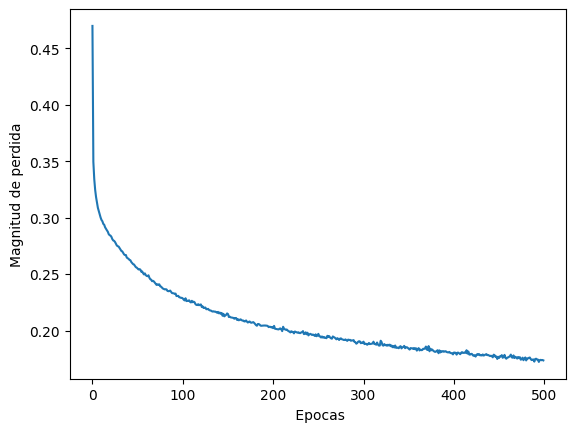

In [102]:
plt.xlabel(" Epocas")
plt.ylabel("Magnitud de perdida")
plt.plot(historial.history["loss"])

In [103]:
# Evaluación del modelo
loss, accuracy = model.evaluate(x_test, y_test)
print(f"Accuracy: {accuracy}")

# Predicciones
y_pred = model.predict(x_test)
y_pred_classes = y_pred.argmax(axis=-1)
y_test_classes = y_test.argmax(axis=-1)

# Reporte de clasificación
print(classification_report(y_test_classes, y_pred_classes))

458/458 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.8262 - loss: 0.7261
Accuracy: 0.8265883922576904
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11147
           1       0.65      0.61      0.63      3506

    accuracy                           0.83     14653
   macro avg       0.76      0.75      0.76     14653
weighted avg       0.82      0.83      0.82     14653



In [104]:
train_loss, train_accuracy = model.evaluate(x_train, y_train, verbose=0)
print('Train Accuracy: %.5f' % train_accuracy)
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=0)
print('Test Accuracy: %.5f' % test_accuracy)
y_pred = model.predict(x_test)

# Convertir predicciones en clases
y_pred_classes = np.argmax(y_pred, axis=1)

# Convertir `y_test` a enteros si está en formato one-hot
if len(y_test.shape) > 1 and y_test.shape[1] > 1:
    y_test_int = np.argmax(y_test, axis=1)
else:
    y_test_int = y_test

# Asegúrate de que `y_test_int` y `y_pred_classes` sean enteros
y_test_int = y_test_int.astype(int)
y_pred_classes = y_pred_classes.astype(int)

# Calcular y mostrar el informe de clasificación
print("Precisión del modelo:", accuracy_score(y_test_int, y_pred_classes))
print(classification_report(y_test_int, y_pred_classes))

Train Accuracy: 0.92556
Test Accuracy: 0.82659
458/458 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Precisión del modelo: 0.8265884119292978
              precision    recall  f1-score   support

           0       0.88      0.90      0.89     11147
           1       0.65      0.61      0.63      3506

    accuracy                           0.83     14653
   macro avg       0.76      0.75      0.76     14653
weighted avg       0.82      0.83      0.82     14653



In [105]:
cm = confusion_matrix(y_test_int, y_pred_classes)
cm

array([[9977, 1170],
       [1371, 2135]], dtype=int64)

<Figure size 5000x2000 with 0 Axes>

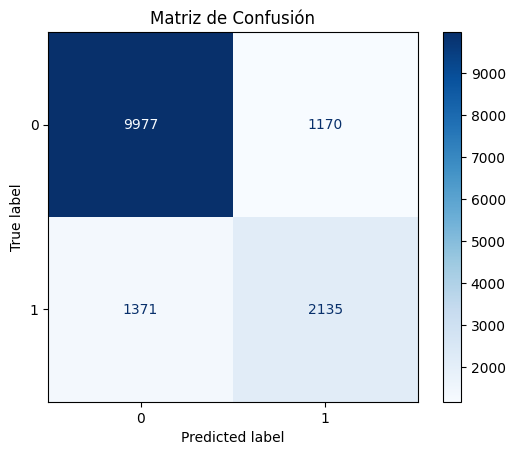

In [106]:
import matplotlib.ticker as ticker
plt.figure(figsize=(50, 20))  
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues, values_format='d') 
ax = plt.gca()
ax.xaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))

plt.title('Matriz de Confusión')
plt.show()

## Bibliografias

### Mlp.md. (n.d.). http://personal.cimat.mx:8181/~mrivera/cursos/aprendizaje_profundo/mlp_pytorch/mlp_pytorch.html